Waves!
======

Imagine a pulse propagating in a string. As the wave travels each
segment of the string moves up and down perpendicular to the direction
of propagation. At the macroscopic level, we observe a transverse wave
that moves along the string, and the individual motion of the segments
is not relevant. In contrast, at the microscopic level, we see discrete
particles undergoing oscillatory motion perpendicular to the motion of
the wave.

In a string, or a solid, or a fluid, the collective motion of the
particles determine the velocity of sound in the medium, as well as the
thermal transport properties.

Coupled oscillators
-------------------

![springs](figures/springs.png)
#### Coupled oscillators in one dimension.

Let us first consider a one-dimensional chain of $N$ particles of mass
$m$ with equal equilibrium separation $a$. The particles are coupled to
massless springs with force constant $k_{c}$, except for the first and
last springs at the two ends of the chain which have spring constant
$k$. the individual displacement of the particle $i$ from its
equilibrium position along the $x$ axis is called $u_{i}$. The ends of
the fist and last spring are assumed fixed: $$u_{0}=u_{N+1}=0.$$ Since
the force of an individual mass is determined only by the compression or
expansion of the adjacent springs, the equation of motion for particle
$i$ is given by: $$\begin{eqnarray}
m\frac{d^{2}u_{i}}{dt^{2}} &=&-k_{c}(u_{i}-u_{i+1})-k_{c}(u_{i}-u_{i-1}) \\
&=&-k_{c}(2u_{i}-u_{i+1}-u_{i-1}).\end{eqnarray}$$

The equations for particles $i=1$ and $i=N$ next to the walls are given
by $$\begin{eqnarray}
m\frac{d^2u_1}{dt^2}&=&-k_c(u_1-u_2)-ku_1, \\
m\frac{d^2u_N}{dt^2}&=&-k_c(u_N-u_{N-1})-ku_N.\end{eqnarray}$$

Note that for $k_c=0$ all the equations will decouple and the motion of
the particles become independent of their neighbors. The above equations
describe longitudinal oscillations, *i. e.* motion along the direction
of the chain. The equations for transverse motion are equivalent.

### Exercise 5.1 

Write a generalization of the program for a mini solar system to describe the
motion of $N$ coupled linear oscillators.

### Exercise 5.2: two coupled oscillators 

1.  Use the previous program with $N=2$. Set the initial conditions $%
    u_{1}=0.5$ an $u_{2}=0$ and compute the time dependence of the
    displacements for $k=1,k_{c}=0.8$ and $k=k_{c}=1$. Remember that the
    mass of the particles has to be set to unity. Describe the
    qualitative behavior or the particles in each case. Is it possible
    to define a period of motion in the first case? What is the period
    in the second case?

2.  Set $k=1,k_{c}=0.2$. Since $k_{c}<k$, we can describe the springs as
    being “weakly coupled”. Observe the time dependence of the
    displacement of particle one. Can you identify two kinds of
    oscillations superimposed on upon each other? What is the time
    between the oscillations of the amplitude? What is the time between
    the zeroes of the displacement? Compute the corresponding angular
    frequency of each oscillation. How does the displacement of particle
    2 correspond to that of particle 1? Determine the qualitative
    changes in the frequencies of each oscillation for $k_{c}=1$.

3.  Choose the initial conditions $u_{1}=u_{2}=0.5$ so that both
    particles have the same initial displacements, Set $k_{c}=0.1$ and
    $k=1$ and describe the motion. Compute the total energy of each
    particle as a function of time and describe its
    qualitative behavior. Does the period of motion depend on $k_{c}$?
    What if the dependence of the period on $k$?

4.  Consider the initial conditions $u_{1}=-u_{2}=0.5$ so that both
    particles have equal but opposite initial displacements. Is there a
    simple sinusoidal oscillation in this case? Compute the period
    $T_{1}$ for ${%
    k=1,k_{c}=1}$, ${k=2,k_{c}=1}$, and ${k=1,k_{c}=2}$. Analyze your
    results for $\omega _{1}^{2}$ and determine its dependence on $k$
    and $k_{c}$. What is the behavior of the energy of each particle as
    a function of time?



In [30]:
import math

class particle(object):  ## We recycle our 1D particle object
    
    def __init__(self, mass=1., x=0., v=0.):
        self.mass = mass
        self.f = 0
        self.x = x
        self.v = v
        
    def move(self, dt):
        # Euler-Cromer
        self.v = self.v + self.f/self.mass*dt
        self.x = self.x + self.v*dt
        
class CoupledSystem(object):

    def __init__(self, N, k, kc, dt, t=0): 
        self.N = N
        self.dt = dt
        self.k = k
        self.kc = kc
        self.particles = [particle()]
        self.t = t
        for i in range(1,N):
            self.particles.append(particle()) # we create a list of N particles

    def evolve(self, fo=1., w=1.):        
        # Compute the interaction forces with the other particles
        
        for i in range(self.N-1):
            self.particles[i].f = self.kc*(self.particles[i+1].x + self.particles[i-1].x - 2*self.particles[i].x)
        
        self.particles[0].f = self.kc*(self.particles[1].x - self.particles[0].x) - self.k*self.particles[0].x + fo*math.cos(w * self.t)
        self.particles[N-1].f = self.kc*(self.particles[N-2].x - self.particles[N-1].x) - self.k*self.particles[N-1].x

        for p in self.particles:
            p.move(dt)
        self.t += self.dt
        
        
    def energy(self):
        # Challenge
        return (ke,pe)


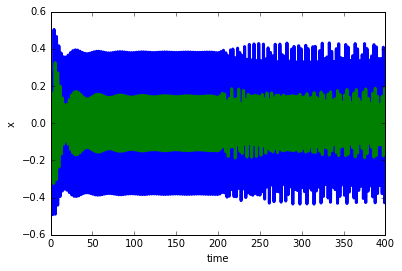

In [45]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 100
k = 1.0
kc = 1.
dt = 0.01
tmax = 400
nsteps = int(tmax/dt)

S = CoupledSystem(N, k, kc, dt)
S.particles[0].x = 0.
S.particles[1].x = 0.

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve(fo=1, w=math.sqrt(5))

pyplot.plot(t, x[0,], color='blue', ls='-', lw=3)
pyplot.plot(t, x[1,], color='green', ls='-', lw=3)

pyplot.xlabel('time')
pyplot.ylabel('x');

We will now calculate the power spectrum and determine the natural frequencies by using the numpy FFT module. The frequency interval is given by 
$$\Delta \omega = \frac{1}{N_{steps}\Delta t}$$

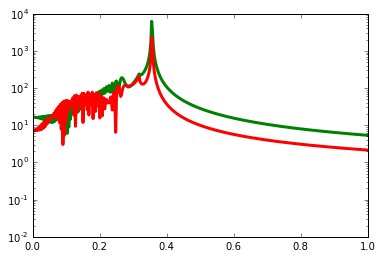

In [46]:
w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x[0,])
u1 = np.fft.rfft(x[1,])

#w = np.fft.fftshift(w)  # We shift the indices to center the frequencies at zero
#u0 = np.fft.fftshift(u0)
#u1 = np.fft.fftshift(u1)

pyplot.semilogy(w, abs(u0), color='green', ls='-', lw=3)
pyplot.semilogy(w, abs(u1), color='red', ls='-', lw=3)
pyplot.xlim(0,1);

### Exercise 5.3: response to an external force 

Add an external driving force $F(t)=F_{0}\cos {\omega t}$ to particle 1.
plot $u_{1}(t)$ and determine its maximum steady state amplitude
$A(\omega )$ for each value of $\omega $. Confirm that near a resonance
$A(\omega )$ exhibits a rapid increase with $\omega $, and $u_{1}(t)$
increases without bound at the resonant frequency. Determine the
resonant frequencies for the pairs of $k$-values already considered in
parts 2-4 in Exercise 5.2. How do these values of $\omega $ compare to
those in the previous exercise?

#### Challenge 5.1: 

- Complete exercise 5.3


### Exercise 5.4: superposition of motion 

The results of the previous exercises make plausible the assumption that
an arbitrary motion of the system can be written as

$$\begin{eqnarray}
u_1(t) &=& A_1\cos{(\omega _1t+\delta _1)} + A_2\cos{(\omega _2 t+\delta _2)} \\
u_2(t) &=& A_1\cos{(\omega _1t+\delta _1)} - A_2\cos{(\omega _2 t+\delta _2)}\end{eqnarray}$$

The values of these constants can be expressed in terms of the initial
values of the displacement and velocities of each particle. determine
these constants for $u_{1}=0.5,u_{2}=0,v_{1}=v_{2}=0$. Verify that the
motion predicted by these equations is consistent with your measure
values for $%
u_{1}$ and $u_{2}$ for $k=1$ and $k_{c}=0.8$ in part 1 of Exercise 5.2.
What is the periodicity of $u_{1}$ and $u_{2}$?

The effect of the spring $k_{c}$ is to couple the motions of two
particles so that they no longer move independently. For special initial
conditions, only one frequency of oscillation appears. The resulting
motion is called a “normal mode” of the system, and the corresponding
frequency a “normal mode frequency”. The higher frequency is given by
$\omega
_{1}^{2}=(k+2k_{c})/m$. In this mode, the two particles oscillate
exactly out of phase with the displacements of opposite directions. The
motion at the lowest frequency $\omega _{2}^{2}=k/m$ corresponds to the
two particles oscillating exactly in phase.

The general motion is a superposition of the two normal modes. Unless
there is a simple relation between the two frequencies, the general
motion is a complicated function of time. However, if the coupling is
small, $\omega _{1}
$ and $\omega _{2}$ are nearly equal and $u_{1}$ and $u_{2}$ exhibit
“beats”. In this case the displacements oscillate rapidly at the angular
frequency $%
1/2(\omega _{1}+\omega _{2})$ with an amplitude that varies sinusoidally
at the beat frequency $1/2(\omega _{1}-\omega _{2})$.

We also found that if we drive the system by an external force applied
to either particle (or both), the system is in resonance if the
frequency of the force corresponds to either of the normal modes. We use
this method for determining the normal mode frequencies in the following
exercises.

### Exercise 5.5: three coupled oscillators 

1.  Run the program with $N=3$, $k_{c}=0.2$ and $k=1$ and arbitrary but
    nonzero initial displacements. Describe the time-dependence of the
    motion of the particles.

2.  Consider the following initial conditions:
    ${u_{1}=u_{2}=u_{3}=0.5}$, ${u_{1}=0.5,u_{2}=-0.5,u_{3}=0.5}$,
    ${u_{1}=0.5,u_{2}=0,u_{3}=-0.5}$ (all the velocities are
    initially zero) If these initial conditions correspond to normal
    modes, determine the normal modes frequencies.

3.  Add an external driving force to particle 1 and determine the normal
    mode frequencies. Compare your results with the frequencies you
    obtained in part 2. How many normal modes are there?

### Exercise 5.6: $N$ coupled oscillators 

1.  Choose $k_{c}=k=1$ and $N=10$. Find the normal modes by applying an
    external force to one of the particles and determine the
    resonant frequencies. Drive the system for several periods of the
    external force and compute the steady state amplitude of the
    displacement of each particle for each value of $\omega $. Try
    values of $\omega $ in the range $0.2(k/m)^{1/2}
    $ to $3(k/m)^{1/2}$. If you think that you are close to a resonance,
    use several other values of $\omega $ to obtain a better estimate.
    How many normal modes are there?

2.  Compare your results in part 1 with the analytic result
    $$\omega _{n}^{2}=\frac{4k}{m}\sin ^{2}\frac{n\pi }{2(N+1)},$$ where
    $N$ is the number of particles and the mode index is $n=1,2,...,N$.




### Exercise 5.7: propagation speed in a linear chain 

Another interesting property to analyze is the propagation of the
energy. In this problem we’ll disturb the system determine the time that
takes for the disturbance to travel a given distance.

1.  Consider a linear chain of coupled oscillators at rest with
    $k=k_{c}=1
    $. Create a disturbance giving particle 1 an initial displacement
    $u_{1}=1$. Determine the time it takes for particles $N/2$ and $N$
    to satisfy the conditions $|u_{N/2}|\ge d$ and $u_{N}\ge d$. Choose
    $N=10$ and $d=0.3$ for your initial runs. Use your results to
    estimate $v$, the speed of propagation of the disturbance. Consider
    larger values of $N$ to ensure that your value is independent of
    $N$.

2.  Do you expect the speed of propagation to be an increasing or
    decreasing function of the spring constant $k$? Do a simulation and
    estimate $v$ for different values of $k$.

3.  Create a disturbance by applying an external force
    $F(t)=F_{0}\cos {%
    \omega t}$ to particle 1. Estimate the propagation speed of the
    disturbance as in part 1. Consider the value so $\omega =0.1$ and
    $\omega =1$. Explain why the propagation speed depends on $\omega $.
    Can a disturbance propagate for $\omega =4$? In what way does the
    system act as a mechanical filter? Explain the “filtering” property
    of the system in terms of the frequency of the normal modes.

Fourier analysis
----------------

In the previous section we found that the displacement of a particle an
be described as a linear combination of normal modes, *i.e.* a
superposition of sinusoidal terms. This decomposition of the motion into
various frequencies is more general. It can be shown that any arbitrary
periodic function $f(x)$ of period $T$ can be written as a Fourier
series of sines and cosines:
$$f(t)=\frac{1}{2}a_{0}+\sum_{n=1}^{\infty }(a_{n}\cos {n\omega t}+b_{n}\sin {%
n\omega t}),$$ where $\omega _{0}$ is the fundamental angular frequency
given by $$\omega _{0}=\frac{2\pi }{T}.$$ The sine and cosine terms
represent the harmonics. The Fourier coefficients $%
a_{n}$ and $b_{n}$ are given by $$\begin{eqnarray}
a_{n} &=& \frac{2}{T}\int_{-T/2}^{T/2}{f(t)\cos{n\omega _0 t}dt}\\
b_{n} &=& \frac{2}{T}\int_{-T/2}^{T/2}{f(t)\sin{n\omega _0 t}dt}\\\end{eqnarray}$$
The constant term $1/2a_{0}$ is the average value of $f(t)$. (all the
oscillating contributions vanish in average)

In general, an infinite number of terms is needed to represent an
arbitrary function $f(t)$. In practice, a good approximation can usually
be obtained by including a relatively small number of terms.

![sawtooth](figures/sawtooth.png)
#### The sawtooth function studied in Exercise 5.8

### Exercise 5.8: Fourier analysis 

1.  Consider the following series $f(t)=\frac{2}{\pi }\sum_{n=1}^{\infty
    }\sin {nt}.$Plot $f(t)$ retaining only the first 3 terms. Increase
    the number of terms until you are satisfied that you are converging
    to $f(t)$ with some arbitrary but sufficient accuracy. What is the
    function represented by the sum?

2.  Use the analytical expression for the Fourier coefficients and
    calculate the integrals using the “sawtooth” function depicted in
    Fig 5.2 to show that they are effectively given by $a_{n}=0$ and
    $b_{n}=(1/n\pi
    )(-1)^{n-1}$

3.  What function os represented by the Fourier series with coefficients
    $%
    a_{0}=0$ and $a_{n}=b_{n}=1/n^{2}$ for $n\ne 0$?




Waves on a string
-----------------

![string](figures/string.png)
#### A stretched string of length $l$ with the ends fixed

The difference between waves and oscillatory motion is the scale. Waves
are the “continuum” limit of the problem, or in the jargon “the long
wavelength” limit. This is because in this limit, all the microscopic
details are “washed out” and only the long distance behavior survives.
In order to understand the transition between these two limits we have
to perform a change of scale. The discrete equations of motion, as shown
previously, can be written as:
$$\frac{d^{2}u}{dt^{2}}=-\frac{k}{m}(2u_{i}-u_{i+1}-u_{i-1}).$$ We
consider the limits $$N\rightarrow \infty ,a\rightarrow 0.$$ with the
length of the chain kept constant. The main result is that in this
limit, the discrete equations of motion can me replaced by the
continuous wave equation:
$$\frac{\partial ^{2}u(x,t)}{\partial t^{2}}=\frac{1}{v^{2}}\frac{\partial
^{2}u(x,t)}{\partial x^{2}},  $$ where $v$ has the dimension
of velocity and it is given by $$v=\sqrt{k/\rho },$$ where $k$ is the
string tension and $\rho $ is the linear density. Observe that the
displacement $u$ of the string is the dependent variable, and that the
position along the string $x$ and the time $t$ are the independent
variables. The existence of two independent variables makes this a
Partial Differential Equation (PDE).

There are many solutions to this equation. Examples are:
$$\begin{eqnarray}
u(x,t) &=&A\cos \frac{2\pi }{\lambda }(x\pm vt), \\
u(x,t) &=&A\sin \frac{2\pi }{\lambda }(x\pm vt).\end{eqnarray}$$ In fact,
it is easy to show that any function of the form $f(x\pm vt)$ is a
solution. Since the differential equation is a linear equation and hence
satisfies the superposition principle, we can understand the behavior of
a wave of arbitrary shape using the Fourier’s theorem to represent its
shape as a sum of sinusoidal waves.

Because both ends of the string are tied down, the boundary conditions
are: $$u(0,t)=u(l,t)=0.\,\,\,\mathrm{(boundary\,\,condition)}$$

Since this is a second order PDE, we still need to determine the initial
distortion $u(x,t=0)$ and velocity $\partial u/\partial t(x,t=0)$. If
the string is released from rest, this reduces to $$\begin{eqnarray}
u(x,t) &=&f(x),\,\,\,\,\mathrm{(initial\,\,condition\,\,1)}
\\
\frac{\partial u}{\partial t}(x,t &=&0)=0.\,\,\,\mathrm{(initial\,%
\,condition\,\,2)}  \end{eqnarray}$$

### Numerical solution: finite differences

![differences](figures/differences.png)
#### Finite differences grid for the vibrating string

To solve the equation (\[wave\]) as a function of position and time we
need to discretize the $(x,t)$ space in a rectangular grid (see Fig
\[grid\]). In the present case, the horizontal axis represents the
position $x$ along the string, and the vertical axis represent time. We
convert the equation to a finite difference equation expressing the
second derivatives in terms of differences

$$\begin{eqnarray}
\frac{\partial ^{2}u(x,t)}{\partial t^{2}} &\simeq &\frac{u(x,t+\Delta
t)+u(x,t-\Delta t)-2u(x,t)}{(\Delta t)^{2}}, \\
\frac{\partial ^{2}u(x,t)}{\partial x^{2}} &\simeq &\frac{u(x+\Delta
x,t)+u(x-\Delta x,t)-2u(x,t)}{(\Delta x)^{2}}.\end{eqnarray}$$

After substituting into (\[wave\]) we obtain the discrete equations:
$$u(x,t+\Delta t)=2u(x,t)-u(x,t-\Delta t)+\frac{v^{2}}{C^{2}}\left[ u(x+\Delta
x,t)+u(x-\Delta x,t)-2u(x,t)\right] ,$$ with $C=\Delta t/\Delta x$ is a
constant with the dimension of velocity.

As shown in Fig. \[grid\], this is a recurrence relation that propagates
the wave from the two earlier times $t-\Delta t$ and $t$, and the three
nearby positions $x-\Delta x$, $x$, and $x+\Delta x$, to a later time $%
t+\Delta t$, and a single position $x$. We can see right a way that this
is not a self starting algorithm, in the sense that we need to know the
position for two earlier times to start the iteration. However, we can
use a simple trick to overcome this difficulty. Rewriting the initial
conditions (\[initial1\]) and (\[initial2\]) in the finite differences
form, we obtain: 
$$\begin{eqnarray}
\frac{\partial u(x,t=0)}{\partial t} &=&0\Rightarrow \frac{u(x,\Delta
t)-u(x,-\Delta t)}{2\Delta t}=0, \\
&\Rightarrow &u(x,-\Delta t)=u(x,\Delta t).\end{eqnarray}$$ 
Using this
condition for the first iteration we obtain
$$u(x,t+\Delta t)=u(x,0)+\frac{1}{2}\frac{v^2}{C^2}
\left[ u(x+\Delta x,t)+u(x-\Delta x,t)-2u(x,t)\right] .$$ The success of
this method depends on the relative sizes of the time and space steps.
This stability criterion says that the finite difference algorithm is
stable if $$v\leq \frac{\Delta x}{\Delta t}=C.  $$ This
means that the solution gets better with smaller time steps, but worse
with smaller space steps!

### Exercise 5.9: Finite differences for the wave equation 

Write a program to solve the wave equation using finite differences.
Assume that the string has a length $l=1$m, a linear density
$\rho =0.01$kg/m, and tension $k=40$N.

1.  Assume as initial conditions that the string is “plucked”:
    $$u(x,t=0)=\left\{ 
    \begin{array}{ll}
    1.25x/l, & \mathrm{for\,\,}x\leq 0.8l, \\ 
    5.0(1-x/l), & \mathrm{for\,\,}x>0.8l,
    \end{array}
    \right.$$ Plot the displacement $u$ as a function of $(x,t)$ using a
    space step $%
    \Delta x=0.01$m, and choosing the time step such that the solution
    is stable.

2.  Explore the use of different steps $\Delta x$ and $\Delta t$ and
    determine at which values the solution becomes unstable. Does your
    assessment agree with the condition (\[stability\])?

3.  Change the initial conditions to $$u(x,t=0)=\left\{ 
    \begin{array}{ll}
    x/l, & \mathrm{for\,\,}0\leq x\leq 0.5, \\ 
    -x/l, & \mathrm{for\,\,}0.5\leq x\leq 0.1,
    \end{array}
    \right.$$ and compare results with the previous simulation.

4.  Consider a string plucked at two points: $$u(x,t=0)/0.005=\left\{ 
    \begin{array}{ll}
    0, & 0.0\leq x\leq 0.1, \\ 
    10x-1, & 0.1\leq x\leq 0.2, \\ 
    -10x+3, & 0.2\leq x\leq 0.3, \\ 
    0, & 0.3\leq x\leq 0.7, \\ 
    10x-7, & 0.7\leq x\leq 0.8, \\ 
    -10x+9, & 0.8\leq x\leq 0.9, \\ 
    0 & 0.9\leq x\leq 1.0.
    \end{array}
    \right.$$ Solve and observe wether the pulses move or oscillate up
    and down.

5.  Explore what happens when the string is places in a “normal mode”,
    for example:

    $$u(x,t=0)=0.001\sin (2\pi x).$$

    Try other modes. See if the sum of two modes gives “beating”.



100
4000.0 6944.44444444 0.576


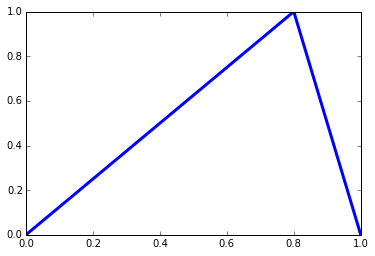

In [4]:
rho = 0.01 #linear density
k = 40  # string constant
v2 = k/rho

l = 1.0    #length of the string
dx = 0.01  # space step
nx = int(l/dx)  # number of points in space
print nx
x = np.zeros(nx+1) # the +1 is necessary to store the value at l
for i in range(nx+1):
    x[i] = i*dx
#x = linspace(0., l, nx)
dt = 0.00012
c2 = (dx/dt)**2
r = v2/c2
print v2,c2,r

# Values for the case with friction (Exercise 5.10)
k = 5
alpha2 = 1./(1./dt**2+k/dt)
beta = k/dt-1./dt**2
####### Let's determine the initial conditions
####### "Kink"
u0 = np.zeros(nx+1)
u0[range(int(0.8*nx))] = 1.25*x[range(int(0.8*nx))]/l
u0[range(int(0.8*nx),nx)] = 5*(1-x[range(int(0.8*nx),nx)]/l)

# "Normal mode"
#u0 = 1*np.sin(2*np.pi*x) 
pyplot.plot(x, u0, color='blue', ls='-', lw=3);


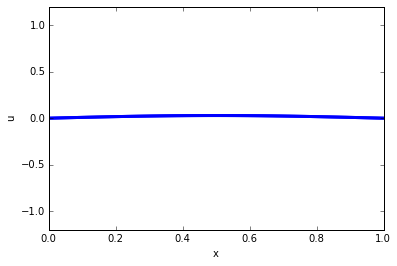

In [6]:
import matplotlib.animation as animation
from JSAnimation.IPython_display import display_animation

y0 = u0
y1 = np.zeros(nx+1) # these arrays will contain the new displacements at t, and t+delta
y2 = np.zeros(nx+1)

#It is not a self-starting algorithm, we need to initialize the first step
y1[0] = 0.
y1[nx] = 0.
for ix in range(1,nx):
    y1[ix] = y0[ix] + 0.5*r*(y0[ix+1]+y0[ix-1]-2*y0[ix]) # case without friction
    

fig = pyplot.figure()
ax = pyplot.axes(xlim=(0, l), ylim=(-1.2, 1.2), xlabel='x', ylabel='u')
points, = ax.plot([], [], marker='', linestyle='-', lw=3)

def evolve(i):
    global y0, y1, y2

    for ix in range(1,nx):
#        y2[ix] = 2*y1[ix] - y0[ix] + r*(y1[ix+1]+y1[ix-1]-2*y1[ix])  # case without friction
        y2[ix] = alpha2/dx**2*(y1[ix+1]+y1[ix-1]-2*y1[ix])+alpha2*beta*y0[ix]+2*alpha2/dt**2*y1[ix] # with friction


    points.set_data(x, y2)

    for ix in range(nx):
        y0[ix] = y1[ix]
        y1[ix] = y2[ix]

# this below is wrong, play and learn!
#    y0 = y1
#    y1 = y2
        
    return points


#anim = animation.FuncAnimation(fig, evolve, frames = 2000, interval=10)

#display_animation(anim, default_mode='once')

for i in range(20000):
    evolve(i)   
pyplot.plot(x, y1, color='blue', ls='-', lw=3);



### Exercise 5.10: String with friction 

The effect of the friction on an element of string $(x,x+\Delta x)$ is
to oppose its motion. Assume that the force of friction is proportional
to the vertical velocity $\partial u/\partial t$ of the string element.
This changes the wave equation to
$$\frac{\partial ^{2}u}{\partial t^{2}}+2\kappa \frac{\partial u}{\partial t}=%
\frac{\partial ^{2}u}{\partial x^{2}},$$ where the constant $\kappa $ is
proportional to the viscosity of the medium in which the string is
vibrating, and is inversely proportional to the density of the string.
Generalize the algorithm for the wave equation to include friction and
observe the change in the wave behavior. Use the same parameters of the
pervious example, with $\kappa =5$.




#### Challenge 5.2: 

Exercise 5.10